## Работа с целевой переменной
### Цель работы
Познакомиться с основными приемами обработки данных в отношении к целевой переменной: дискретизация, отбор признаков, устранение дисбаланса классов.

### Содержание работы
1) Загрузите первый датасет для регрессии и познакомьтесь с его структурой.
2) Постройте простую модель регрессии и оцените ее качество.
3) Отберите признаки, наиболее сильно влияющие на значение целевой переменной.
4) Постройте модель на оставшихся данных и оцените ее качество.
5) Загрузите второй датасет для регрессии и постройте распределение целевой переменной.
6) Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.
7) Загрузите датасет для классификации. Постройте распределение целевой переменной.
8) Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.
9) Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.
10) Выравняйте распределение классов путем оверсемплинга с повторением

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.

In [2]:
from sklearn.datasets import fetch_openml
df = fetch_openml("mtp", version=1)
df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


In [3]:

df.target.head()

0    0.000000
1    0.017173
2    0.035667
3    0.043593
4    0.044914
Name: oz203, dtype: float64

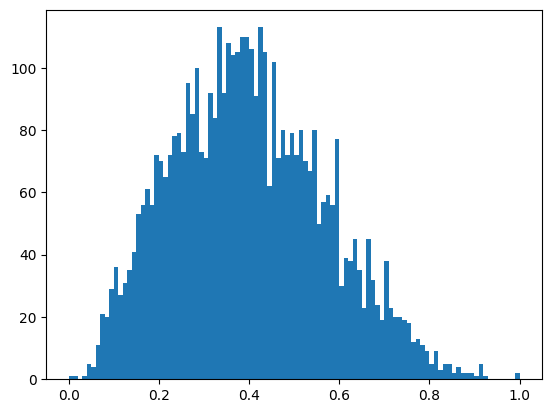

In [4]:
plt.hist(df.target, 100)
_ = plt.plot()

### 2. Постройте простую модель регрессии и оцените ее качество.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)
baseline = LinearRegression()
baseline.fit(X_train, y_train)

LinearRegression()

In [6]:
bl_score = baseline.score(X_test, y_test)
bl_score

-1.651134075774149

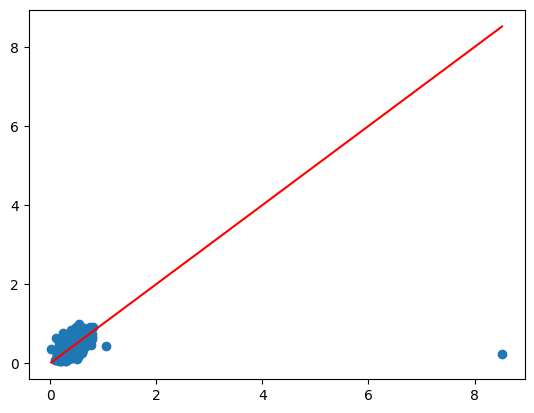

In [7]:

y_pred = baseline.predict(X_test)
plt.scatter(y_pred, y_test)
min_val = min(y_pred.min(), y_test.min())
max_val = max(y_pred.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], c='r')

### 3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.

Text(0.5, 0, 'Feature Importance')

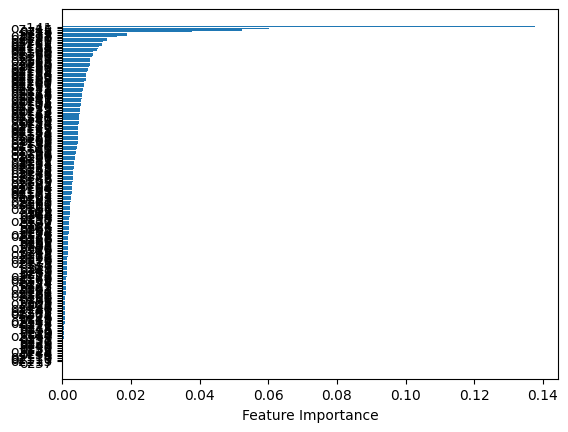

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [9]:
rf.feature_importances_[sort][-10:]

array([0.01191552, 0.01299734, 0.01308195, 0.01585758, 0.01872027,
       0.01876949, 0.03765216, 0.05223666, 0.06007774, 0.13755948])

In [10]:
df.data.columns[sort][-10:]

Index(['oz201', 'oz112', 'oz20', 'oz197', 'oz18', 'oz137', 'oz35', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [11]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz157,oz58,oz170,oz63,oz160,oz109,oz198,oz155,oz158,oz153,oz201,oz112,oz20,oz197,oz18,oz137,oz35,oz48,oz15,oz141
0,0.000000,0.000,0.866163,0.000000,0.865588,0.076923,0.039213,0.752291,0.800120,0.052296,0.127564,0.000000,0.000000,0.505899,0.0625,0.000000,0.0,0.312855,0.000000,0.041308
1,0.000281,0.000,0.866069,0.296833,0.866714,0.153846,0.326584,0.745984,0.791224,0.060922,0.475618,0.222222,0.242424,0.683820,0.0625,0.278945,0.4,0.297041,0.282828,0.212274
2,0.001852,0.125,0.866224,0.000000,0.865890,0.076923,0.204885,0.753298,0.798276,0.072628,0.497968,0.000000,0.388889,0.499219,0.1250,0.000000,0.0,0.288557,0.388889,0.063643
3,0.000158,0.000,0.865988,0.168624,0.865875,0.076923,0.023469,0.767469,0.800965,0.054593,0.134458,0.000000,0.095238,0.630533,0.0000,0.039437,0.1,0.310692,0.111111,0.031193
4,0.000037,0.125,0.866283,0.000000,0.865112,0.076923,0.111398,0.741548,0.802893,0.045400,0.295913,0.000000,0.260870,0.516053,0.0625,0.000000,0.0,0.286581,0.304348,0.063643


### 4. Постройте модель на оставшихся данных и оцените ее качество.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)
better = LinearRegression()
better.fit(X_train, y_train)

LinearRegression()

In [13]:
print(bl_score)
better.score(X_test, y_test)

-1.651134075774149


0.37555321446615086

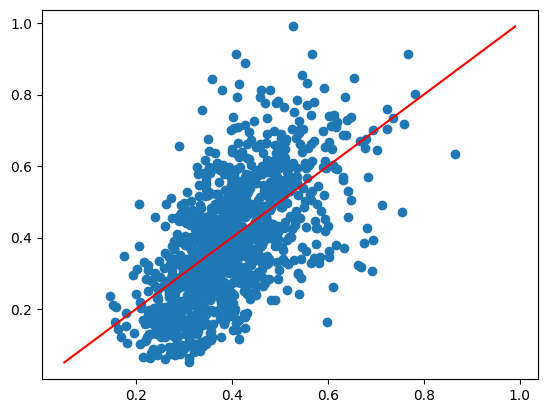

In [14]:
y_pred = better.predict(X_test)
plt.scatter(y_pred, y_test)
min_val = min(y_pred.min(), y_test.min())
max_val = max(y_pred.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], c='r')

### 5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.

In [15]:
df = fetch_openml("balance-scale", version=1)
df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


<Axes: xlabel='class', ylabel='Count'>

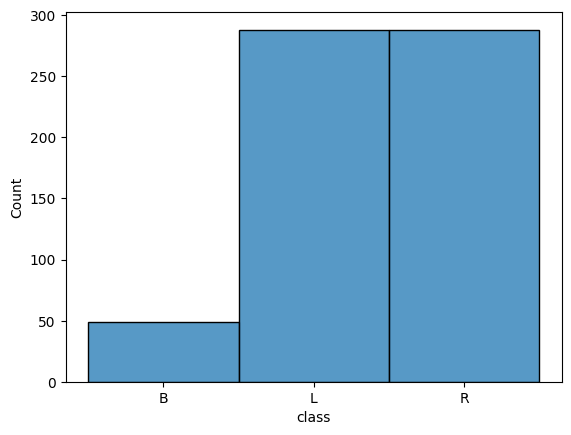

In [16]:

sns.histplot(df.target)

### 6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.

<Axes: xlabel='class', ylabel='Count'>

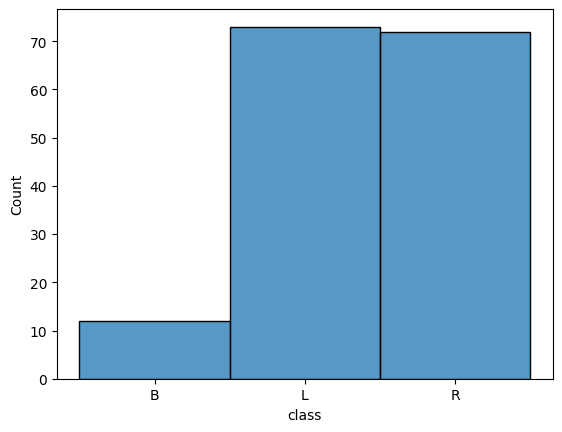

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)
sns.histplot(y_test)

### 8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.

In [18]:

from sklearn.linear_model import LogisticRegression
baseline = LogisticRegression()
baseline.fit(X_train, y_train)

LogisticRegression()

In [19]:
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



Фактически, модель вообще ни разу не распознала правильно объект миноритарного класса. Поэтому невзвешенная оценка качества модели на самом деле ближе к отметке в 60%. Это не очень удовлетворительный результат.

In [21]:

print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


### 9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.

In [22]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [23]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [24]:
print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [25]:
print(confusion_matrix(y_test, weighted.predict(X_test)))

[[11  0  1]
 [ 4 67  2]
 [ 3  2 67]]


### 10. Выравняйте распределение классов путем оверсемплинга с повторением

In [26]:
y_train.value_counts()

class
R    216
L    215
B     37
Name: count, dtype: int64

In [27]:
X_train["target"] = y_train

In [28]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [29]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


In [30]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [31]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

## Задания для самостоятельного выполнения
### 1. Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

In [33]:
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

In [34]:
sorted_indices = np.argsort(feature_importances)[::-1]
num_features_range = range(1, X_train.shape[1] + 1)
accuracies = []
for num_features in num_features_range:
    selected_features = sorted_indices[:num_features]
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

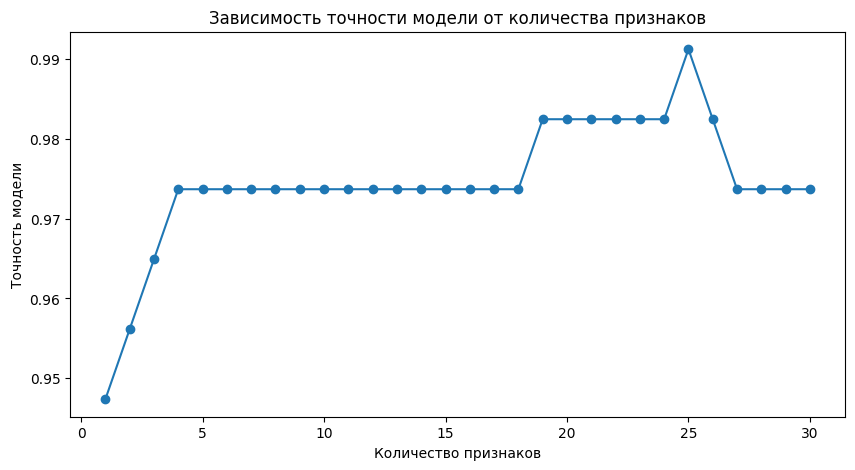

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(num_features_range, accuracies, marker='o', linestyle='-')
plt.xlabel("Количество признаков")
plt.ylabel("Точность модели")
plt.title("Зависимость точности модели от количества признаков")
plt.show()

### 2. Используйте другие методы отбора признаков:
- Исключение низкодисперсных признаков;
- Исключение по парным стаистическим критериям (хи-квадрат, тест Фишера, коэффициент корреляции, информационный критерий);
- Рекурсивное исключение признаков;
- Последовательное включение признаков;
- Исключение по L1-норме (гребневой регрессии).


In [36]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, SequentialFeatureSelector, VarianceThreshold
from sklearn.linear_model import Lasso

In [37]:
methods = {
    "Random Forest Importance": lambda X, y: np.argsort(RandomForestClassifier(n_estimators=100, random_state=42).fit(X, y).feature_importances_)[::-1],
    "Variance Threshold": lambda X, y: np.argsort(VarianceThreshold(threshold=0.01).fit(X).variances_)[::-1],
    "Chi-Square": lambda X, y: np.argsort(SelectKBest(score_func=chi2, k=X.shape[1]).fit(X, y).scores_)[::-1],
    "Recursive Feature Elimination": lambda X, y: np.argsort(RFE(LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1).fit(X, y).ranking_),
    "Sequential Feature Selection": lambda X, y: np.argsort(SequentialFeatureSelector(LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=1).fit(X, y).support_)[::-1],
    "L1 Regularization": lambda X, y: np.argsort(abs(Lasso(alpha=0.01).fit(X, y).coef_))[::-1]
}

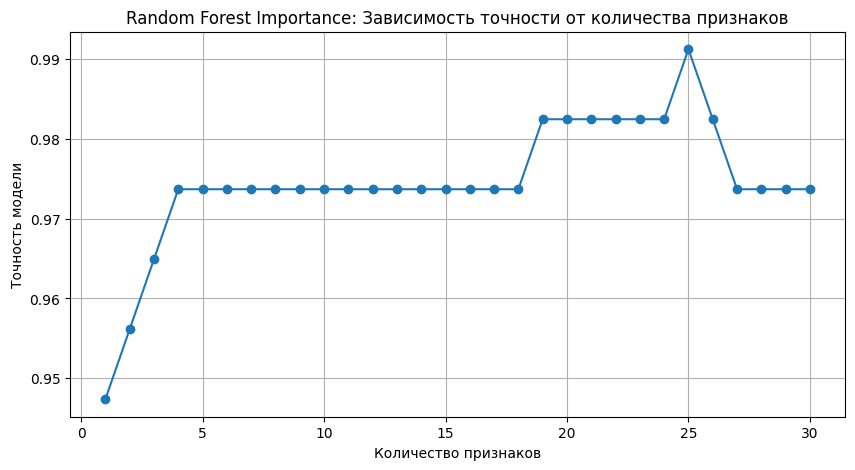

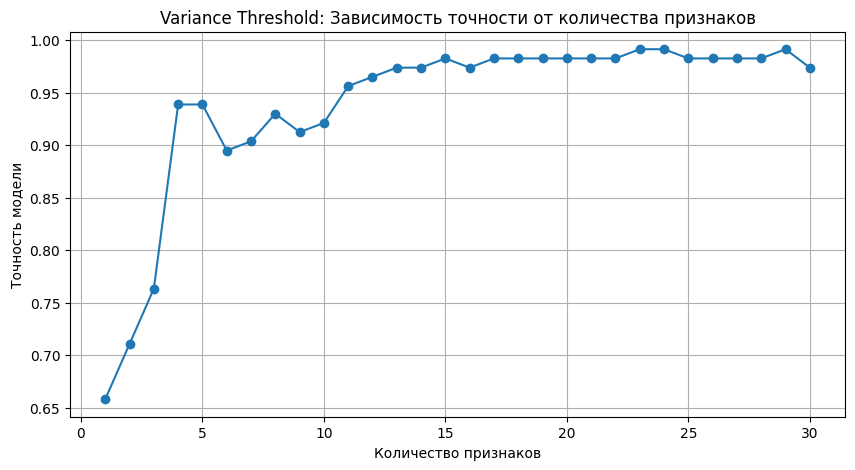

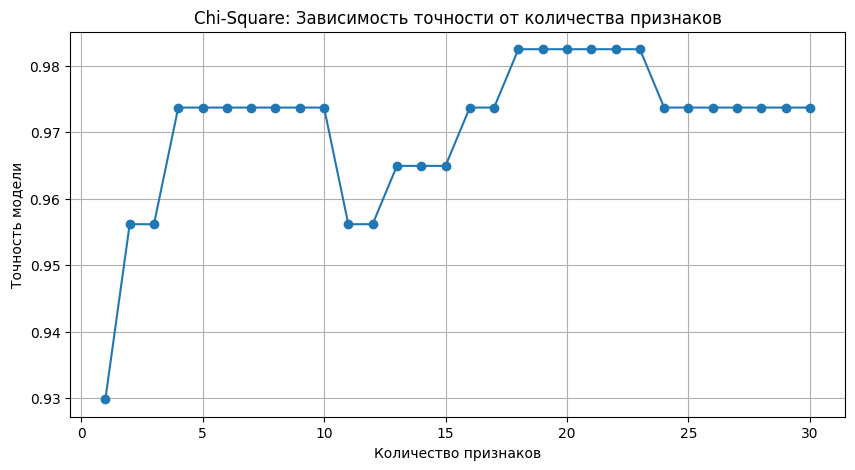

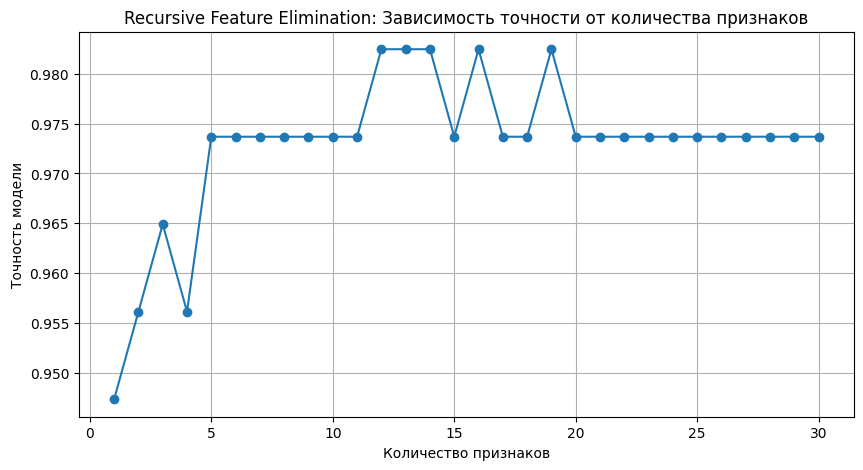

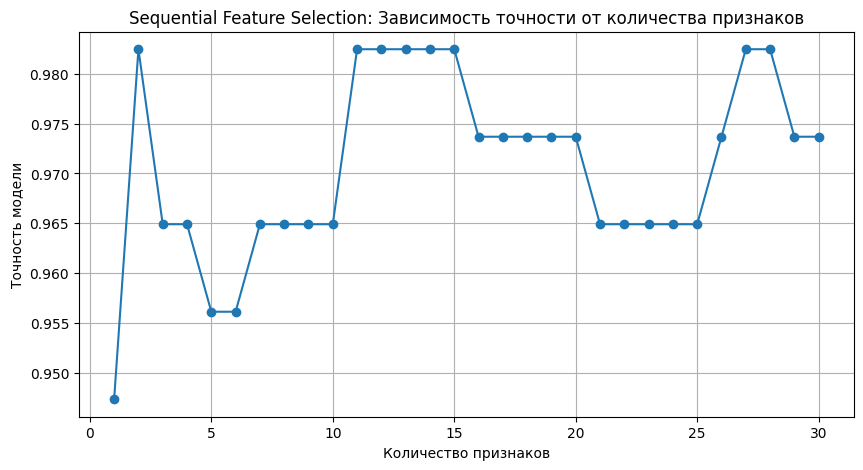

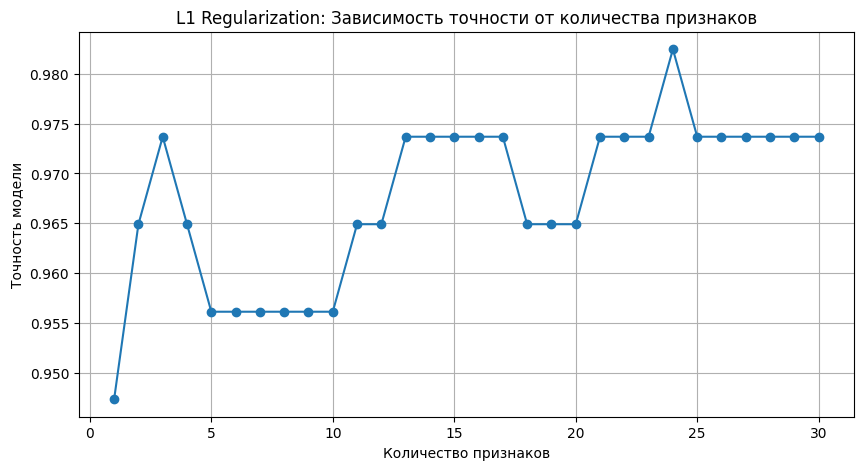

In [38]:
for method_name, selector in methods.items():
    if method_name == "Chi-Square":
        min_val = X_train.min()
        if min_val < 0:
            X_train_proc = X_train - min_val
            X_test_proc = X_test - min_val
        else:
            X_train_proc = X_train
            X_test_proc = X_test
        sorted_indices = selector(X_train_proc, y_train)
    else:
        sorted_indices = selector(X_train, y_train)
        X_train_proc, X_test_proc = X_train, X_test

    num_features_range = range(1, X_train.shape[1] + 1)
    accuracies = []

    for num_features in num_features_range:
        selected_features = sorted_indices[:num_features]
        X_train_selected = X_train_proc[:, selected_features]
        X_test_selected = X_test_proc[:, selected_features]

        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 5))
    plt.plot(num_features_range, accuracies, marker='o', linestyle='-')
    plt.xlabel("Количество признаков")
    plt.ylabel("Точность модели")
    plt.title(f"{method_name}: Зависимость точности от количества признаков")
    plt.grid()
    plt.show()

### 3. Изучите возможности библиотеки imbalanced-learn. Примените на данном примере возможности данной библиотеки для оверсемплинга и андерсемплинга выборки.

In [39]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("Распределение классов после оверсемплинга:")
print(pd.Series(y_train_ros).value_counts())

Распределение классов после оверсемплинга:
1    286
0    286
Name: count, dtype: int64


In [40]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print("\nРаспределение классов после андерсемплинга:")
print(pd.Series(y_train_rus).value_counts())


Распределение классов после андерсемплинга:
0    169
1    169
Name: count, dtype: int64


### 4. Исследуйте влияние дискретизации целевой переменной на качество модели. Используйте уже продемострированный подход - построение базовой модели (baseline) и сравнение модели после обработки данных с базовой. Проверьте разное количество категорий, а также разные стратегии группировки. Сделайте выводы. Обратите внимание, что после биннинга целевой переменной она стала категориальной. А значит, задача превратилась в задачу классификации.

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
baseline_reg = LinearRegression()
baseline_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred_reg = baseline_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

MSE: 0.06, R²: 0.73


Дискретизация целевой переменной

Равные интервалы

In [43]:
n_bins_list = [3, 5, 10]  # Проверяем разное количество бинов

for n_bins in n_bins_list:
    y_binned = pd.cut(y, bins=n_bins, labels=False)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_binned, test_size=0.3, random_state=42)

    model_clf = LogisticRegression(max_iter=1000)
    model_clf.fit(X_train_clf, y_train_clf)
    accuracy = model_clf.score(X_test_clf, y_test_clf)
    print(f"(bins={n_bins}) - Accuracy: {accuracy:.4f}")

(bins=3) - Accuracy: 0.9825
(bins=5) - Accuracy: 0.9825
(bins=10) - Accuracy: 0.9825



Ручное разбиение

In [44]:
bins = [-1, 0.5, 1.5]  
y_binned = pd.cut(y, bins=bins, labels=False, include_lowest=True)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_binned, test_size=0.3, random_state=42)

model_clf = LogisticRegression(max_iter=1000)
model_clf.fit(X_train_clf, y_train_clf)
accuracy = model_clf.score(X_test_clf, y_test_clf)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9825
